In [81]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [82]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams.update({'font.size': 24})

# **Analytical Solutions**

**Analytical solutions, also called closed-form solutions, are mathematical solutions in the form of math expressions.**

- **Transparency: Because analytical solutions are presented as math expressions, they offer a clear view into how variables and interactions between variables affect the result.**

- **Efficiency: Algorithms and models expressed with analytical solutions are often more efficient than equivalent numeric implementations.**

Source: [Derive closed-form analytical solutions to math and engineering problems](https://www.mathworks.com/discovery/analytical-solution.html) from MATLAB

## **Example of an Analytical Solution**

**Finding the integral of the function $f(x)$ from [0,10]**

$\int_0^{10} x \ dx$

$= \frac{x^2}{2} \Big|_0^{10}$

$= \frac{10^2}{2} - \frac{0^2}{2}$

$= \frac{100}{2}$

$=50$

In [83]:
def func(x):
  return x

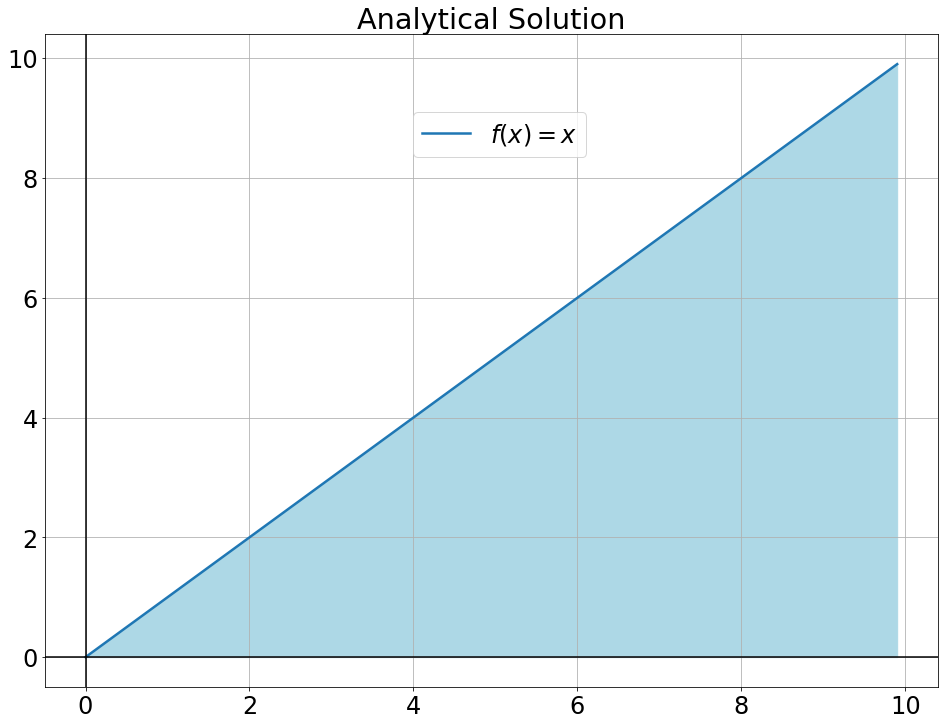

In [84]:
plt.plot(np.arange(0,10,.1), [func(x) for x in np.arange(0,10,.1)],lw=2.5,label = '$f(x) = x$')
plt.fill_between(np.arange(0,10,.1), [func(x) for x in np.arange(0,10,.1)], color='lightblue')
plt.axvline(color='black')
plt.axhline(color='black')
plt.title('Analytical Solution')
plt.grid()
plt.legend(bbox_to_anchor=(.5, .5, .12, .4));

# **Numerical (Computational) Solutions**

**Numerical methods are techniques by which mathematical problems cannot readily or possibly be solved by analytical method.**

- **Numerical solutions are available only at selected (discrete) solution  points, but not at all points covered by the functions as in the case with analytical solution methods.**

- **Numerical methods are trail-and-error processes. Typically, users need to 
estimate an initial solution with selected increment of the variable to which the intended solution will cover.**

- **Two dissadvantages of numerical methods is that they are noisy and numerical methods take longer to compute relative to analytic methods.**

Source: [Numerical Solution Methods for Engineering Analysis](https://www.sjsu.edu/me/docs/hsu-Chapter%2010%20Numerical%20solution%20methods.pdf) by Tai-Ran Hsu

Reference: [Monte Carlo Integration](https://cs184.eecs.berkeley.edu/sp21/lecture/12-0/monte-carlo-integration) by Ren Ng and Angjoo Kanazawa

Reference: [Monte Carlo Integration](https://cs.dartmouth.edu/wjarosz/publications/dissertation/chapter6.pdf) by Wojciech Jarosz

# **Monte Carlo Integration**

**In mathematics, Monte Carlo integration is a technique for numerical integration using random numbers. It is a particular Monte Carlo method that numerically computes a definite integral. While other algorithms usually evaluate the integrand at a regular grid, Monte Carlo randomly chooses points at which the integrand is evaluated. This method is particularly useful for higher-dimensional integrals.**

$\large{\langle F^N \rangle = (b-a)\frac{1}{N}} \sum_{i=0}^{N-1}f(x_i) \approx \int_a^b f(x) dx$

Source: [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) from Wikipedia

Source: [Monte Carlo integration and random numbers](https://www.mv.helsinki.fi/home/rummukai/simu/random) by Kari Rummukainen

In [85]:
def mc_integral(func, limits = [0,1],sample_size = 1000):
  sample_list = []
  while len(sample_list) < sample_size:
    sample_list.append(func(np.random.uniform(low = limits[0],high = limits[1])))
  return [sum(sample_list) * ((limits[1] - limits[0])/sample_size),sample_list]

In [86]:
integral_estimate, list_sample = mc_integral(func, limits=[0,10], sample_size = 200)

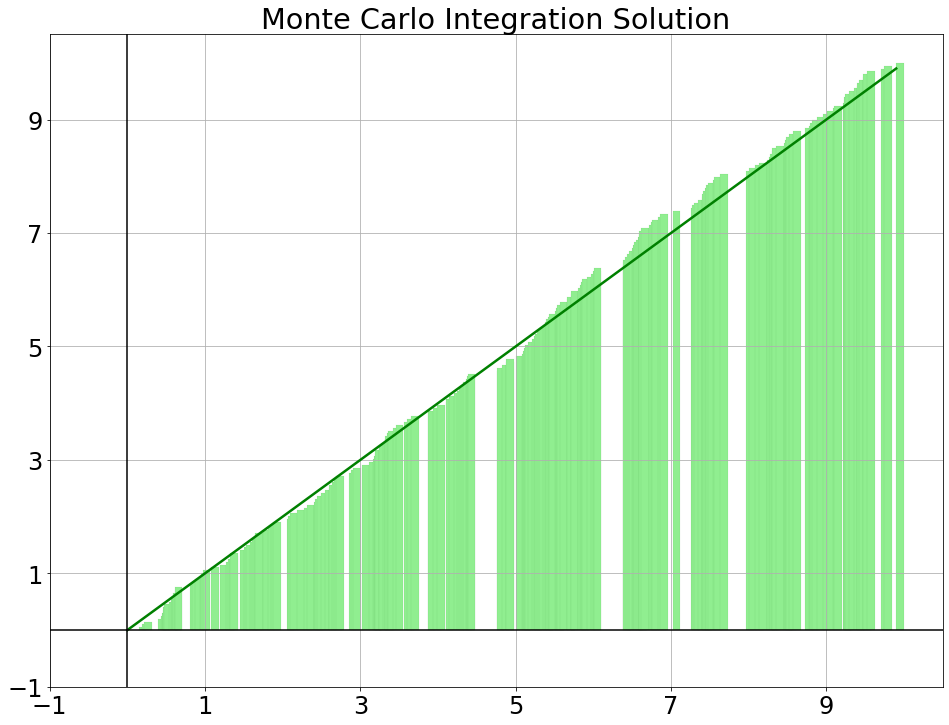

In [87]:
plt.plot(np.arange(0,10,.1), [func(x) for x in np.arange(0,10,.1)],lw=2.5, color = 'green')
plt.bar(sorted(list_sample),np.linspace(0,10,len(list_sample)), color = 'lightgreen',width=.1,edgecolor='darkgreen',lw=.05)
plt.axvline(color='black')
plt.axhline(color='black')
plt.title('Monte Carlo Integration Solution')
plt.xticks(np.arange(-1,11,2))
plt.yticks(np.arange(-1,11,2))
plt.grid();

In [88]:
integral_estimate

49.57715531261666

# **Estimating a Hard to Solve Integral**

**The probability density function of a normal distribution: $\large{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}}(\frac{x-\mu}{\sigma})^2}$**

$\large{=\frac{1}{\sigma\sqrt{2\pi}}e^\frac{(x-\mu)^2}{2\sigma^2}}$

## **Example:**

**Miraculin—a protein naturally
produced in a rare tropical fruit—can convert a sour taste
into a sweet taste. Consequently, miraculin has the potential
to be an alternative low-calorie sweetener. In Plant
Science (May, 2010), a group of Japanese environmental
engineers investigated the ability of a hybrid tomato plant
to produce miraculin. For a particular generation of the
tomato plant, the amount $Y$ of miraculin produced (measured
in micro-grams per gram of fresh weight) had a mean
of 105.3 and a standard deviation of 8.0. Assume that $Y$ is
normally distributed.**

**Find the probability that the amount of miraculin produced for a batch of tomatos ranges from 100 micro-grams to 110 micro-grams.**

**$\frac{1}{8\sqrt{2\pi}}e^{-\frac{1}{2}}(\frac{x-105.3}{8})^2$**

Source: [Statistics for Engineering and the Sciences](https://www.routledge.com/Statistics-for-Engineering-and-the-Sciences/Mendenhall-Sincich/p/book/9781498728850) by William M. Mendenhall and Terry L. Sincich

In [89]:
def norm_dist(x, mu = 105.3, sigma = 8):
  return 1/(sigma*(2*np.pi)**.5) * np.e**((-1/2) * ((x-mu)/sigma)**2)

mu,sigma = 105.3,8

In [90]:
x_i = np.arange(mu-(sigma*3),mu+(sigma*3),.01)
y = [norm_dist(x) for x in x_i]

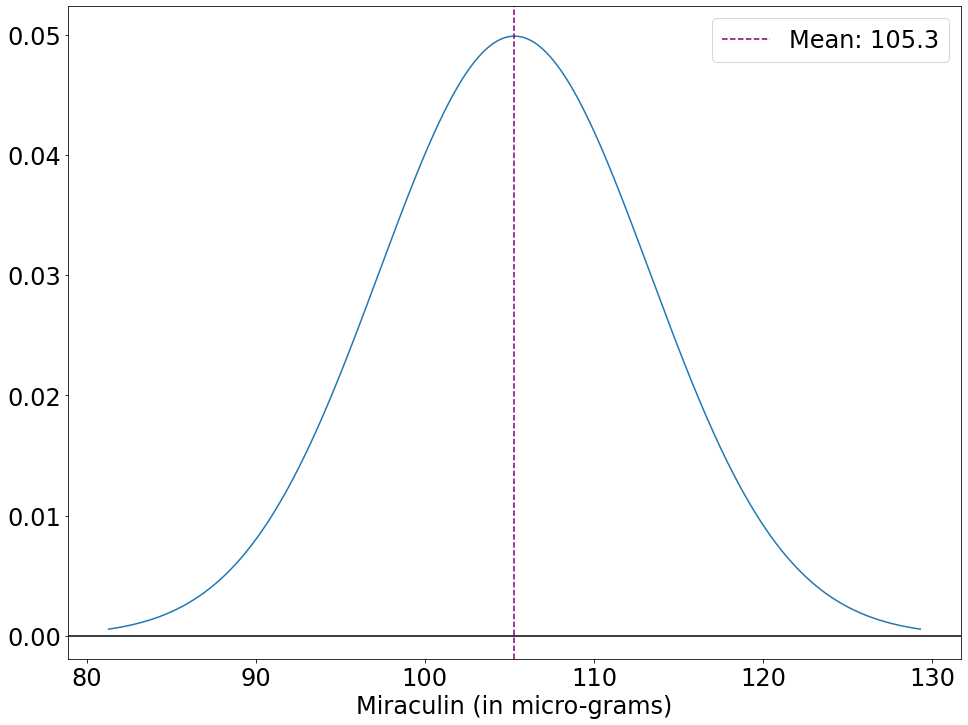

In [91]:
plt.plot(x_i,y)
plt.axvline(x=105.3, color = 'purple', label = f'Mean: {mu}', linestyle='--')
plt.axhline(color = 'black')
plt.xlabel('Miraculin (in micro-grams)')
plt.legend();

In [92]:
integral_estimate, mc_sample = mc_integral(norm_dist, limits=[100,110], sample_size = 1000)

In [93]:
integral_estimate

0.4677560648017169

### **Checking the Monte Carlo integration estimate against z-score**

In [94]:
a = (100-mu)/sigma
b = (110-mu)/sigma

analytic_solution = stats.norm.cdf(b)-stats.norm.cdf(a)
analytic_solution

0.46774060735418854

In [95]:
mc_sample_plot = sorted(mc_integral(norm_dist, limits=[100,mu], sample_size = 50)[1]) + sorted(mc_integral(norm_dist, limits=[mu,110], sample_size = 50)[1], reverse=True)

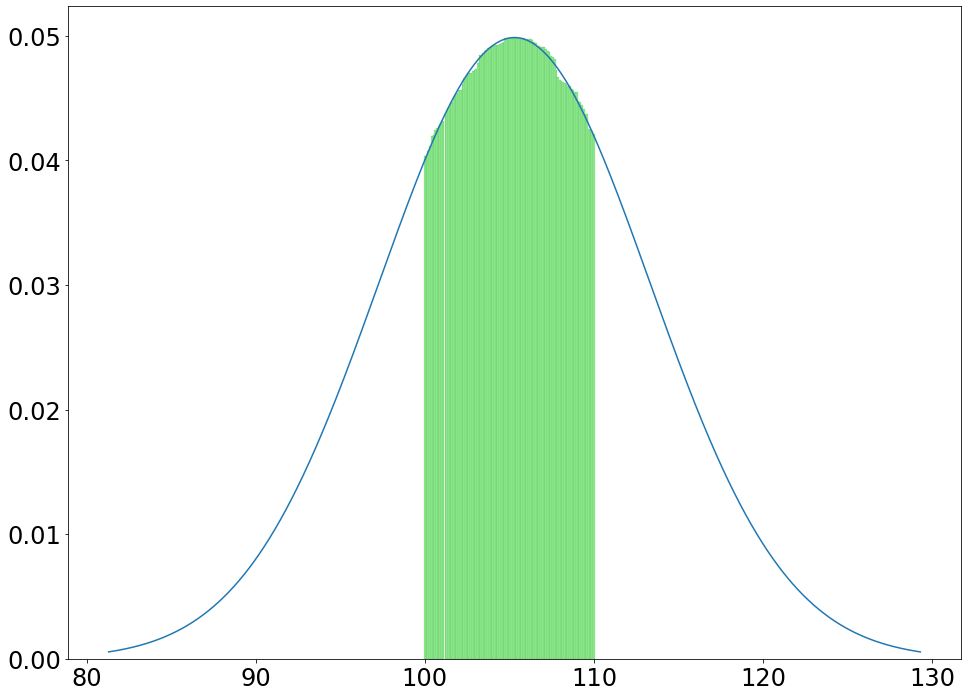

In [96]:
plt.plot(x_i,y)
plt.bar(np.linspace(100,110,len(mc_sample_plot)), mc_sample_plot, color = 'lightgreen',width=.1,edgecolor='darkgreen',lw=.1);

In [97]:
error_plot = []

for i in range(10,10010,10):
  mc_sample_i = mc_integral(norm_dist, limits=[100,110], sample_size = i)[0]
  error_plot.append(abs(analytic_solution - mc_sample_i))

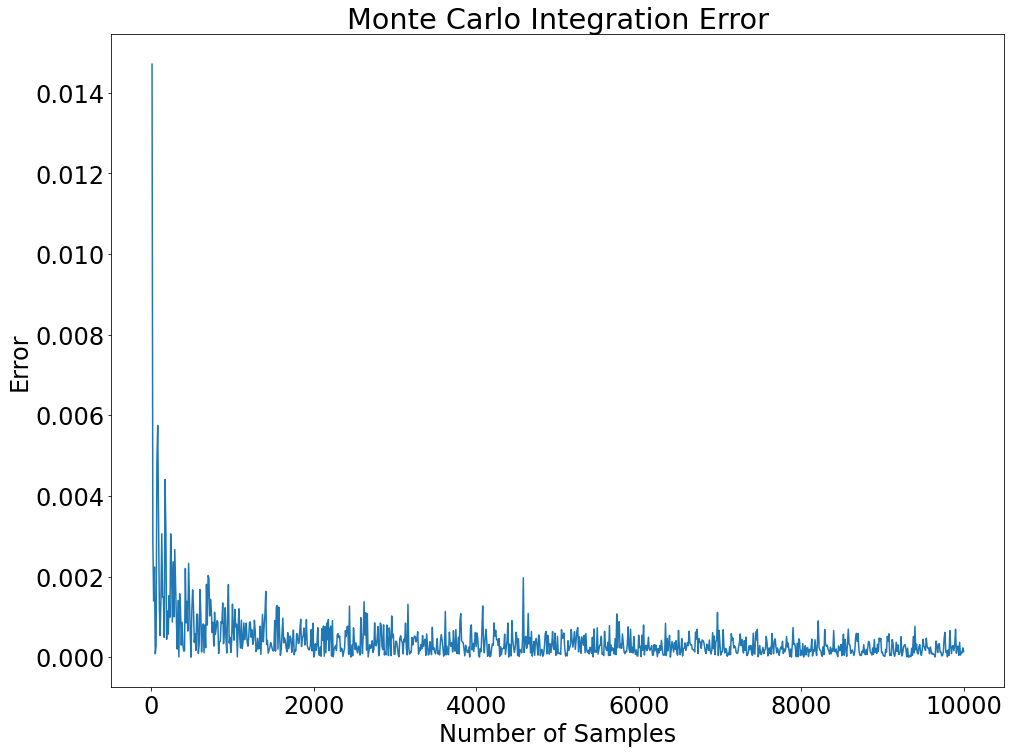

In [98]:
plt.plot([i for i in range(10,10010,10)],error_plot)
plt.title('Monte Carlo Integration Error')
plt.xlabel('Number of Samples')
plt.ylabel('Error');

In [99]:
1/len(mc_sample)**.5

0.03162277660168379

# **References and Additional Learning**

## **Textbook**
- **[Statistics for Engineering and the Sciences](https://www.routledge.com/Statistics-for-Engineering-and-the-Sciences/Mendenhall-Sincich/p/book/9781498728850) by William M. Mendenhall and Terry L. Sincich**


## **Websites**

- **[Derive closed-form analytical solutions to math and engineering problems](https://www.mathworks.com/discovery/analytical-solution.html) from MATLAB**

- **[Monte Carlo integration and random numbers](https://www.mv.helsinki.fi/home/rummukai/simu/random) by Kari Rummukainen**

- **[Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) from Wikipedia**

- **[Monte Carlo Integration](https://cs184.eecs.berkeley.edu/sp21/lecture/12-0/monte-carlo-integration) by Ren Ng and Angjoo Kanazawa**

- **[Monte Carlo Integration](https://cs.dartmouth.edu/wjarosz/publications/dissertation/chapter6.pdf) by Wojciech Jarosz**

- **[Numerical Solution Methods for Engineering Analysis](https://www.sjsu.edu/me/docs/hsu-Chapter%2010%20Numerical%20solution%20methods.pdf) by Tai-Ran Hsu**

# **Connect**

- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG) and [GitHub](https://github.com/ad17171717)**